In [1]:
import requests
from io import BytesIO
import pandas as pd
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 31 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 144439 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [0]:
page = 1
url = "https://finance.naver.com/sise/investorDealTrendDay.nhn?bizdate=20200522&sosok=&page={page}".format(page=page)
resp = requests.get(url)
html = BytesIO(resp.content)
df = pd.read_html(html)[0]

In [3]:
cols = df.columns
cols

MultiIndex([(  '날짜',     '날짜'),
            (  '개인',     '개인'),
            ( '외국인',    '외국인'),
            ( '기관계',    '기관계'),
            (  '기관',   '금융투자'),
            (  '기관',     '보험'),
            (  '기관', '투신(사모)'),
            (  '기관',     '은행'),
            (  '기관', '기타금융기관'),
            (  '기관',   '연기금등'),
            ('기타법인',   '기타법인')],
           )

In [4]:
df = pd.DataFrame(columns = cols)
df

Empty DataFrame
Columns: [(날짜, 날짜), (개인, 개인), (외국인, 외국인), (기관계, 기관계), (기관, 금융투자), (기관, 보험), (기관, 투신(사모)), (기관, 은행), (기관, 기타금융기관), (기관, 연기금등), (기타법인, 기타법인)]
Index: []

In [6]:
from tqdm import tqdm

for page in tqdm(range(1, 400)):
  url = "https://finance.naver.com/sise/investorDealTrendDay.nhn?bizdate=20200522&sosok=&page={page}".format(page=page)
  resp = requests.get(url)
  html = BytesIO(resp.content)
  df_single = pd.read_html(html)[0].dropna()
  df = pd.concat([df, df_single])
df

100%|██████████| 399/399 [07:59<00:00,  1.20s/it]


날짜       개인     외국인     기관계  ...     기관                  기타법인
          날짜       개인     외국인     기관계  ...     은행 기타금융기관    연기금등   기타법인
0   20.05.22   9362.0 -4749.0 -4485.0  ...  -58.0    0.0  -763.0 -128.0
1   20.05.21   2904.0   764.0 -3882.0  ...  -16.0   65.0    25.0  214.0
2   20.05.20  -1819.0   788.0   981.0  ...   -4.0   75.0   552.0   49.0
3   20.05.19 -11869.0  3658.0  8432.0  ...  150.0  114.0  1909.0 -221.0
4   20.05.18    301.0  -931.0   339.0  ...    4.0   96.0   706.0  291.0
..       ...      ...     ...     ...  ...    ...    ...     ...    ...
0   05.01.07   1143.0   178.0 -1321.0  ...    0.0  -24.0    40.0    0.0
1   05.01.06    858.0    -6.0  -852.0  ... -182.0   -6.0    71.0    0.0
2   05.01.05     10.0   246.0  -256.0  ...   40.0  -20.0   -57.0    0.0
3   05.01.04    -63.0   397.0  -334.0  ...  -30.0  -10.0   124.0    0.0
4   05.01.03   -488.0   995.0  -507.0  ...   20.0    5.0    -1.0    0.0

[3985 rows x 11 columns]

In [7]:
df.reset_index(drop=True, inplace=True)
df.columns = df.columns.droplevel()
df.head()

,날짜,개인,외국인,기관계,금융투자,보험,투신(사모),은행,기타금융기관,연기금등,기타법인
0,20.05.22,9362.0,-4749.0,-4485.0,-2513.0,-180.0,-971.0,-58.0,0.0,-763.0,-128.0
1,20.05.21,2904.0,764.0,-3882.0,-3422.0,-310.0,-225.0,-16.0,65.0,25.0,214.0
2,20.05.20,-1819.0,788.0,981.0,-78.0,-22.0,459.0,-4.0,75.0,552.0,49.0
3,20.05.19,-11869.0,3658.0,8432.0,5235.0,15.0,1009.0,150.0,114.0,1909.0,-221.0
4,20.05.18,301.0,-931.0,339.0,-245.0,-108.0,-114.0,4.0,96.0,706.0,291.0


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50808 missing from current font.
  font.set_text(s, 0

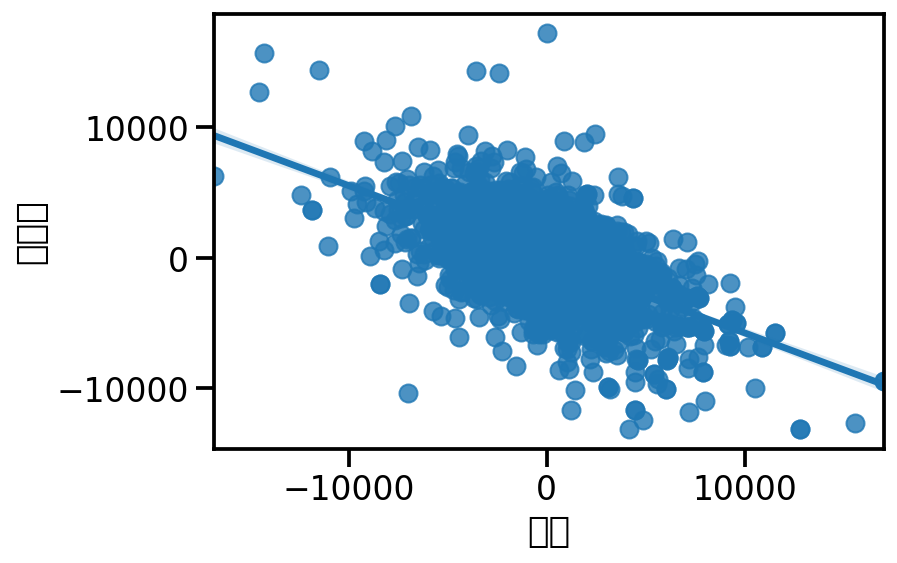

In [8]:
sns.set_context('talk')
sns.regplot('개인',  '외국인',  df)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50808 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50808 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text

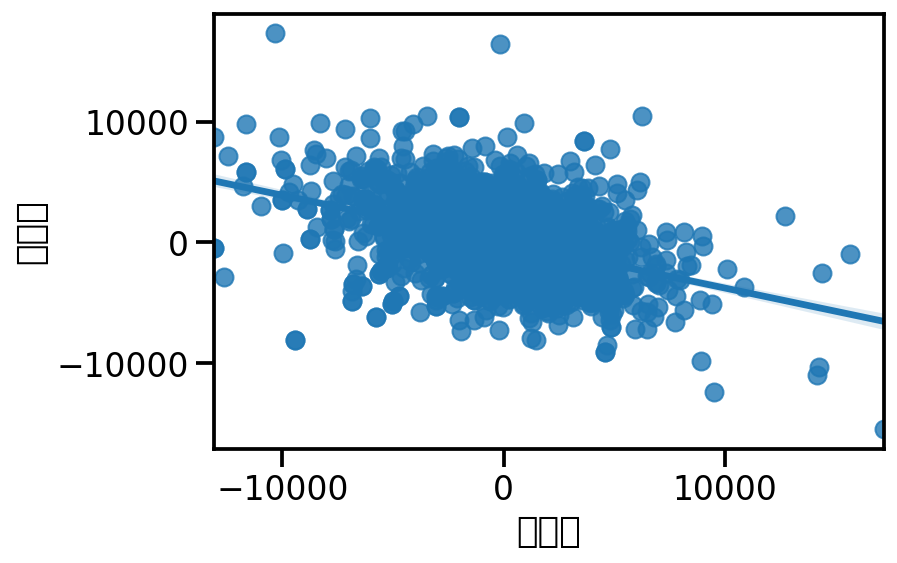

In [9]:
sns.regplot('외국인',  '기관계',  df)

In [17]:
import itertools as it
list(it.combinations(['개인',  '외국인',  '기관계'],  2))

[('개인', '외국인'), ('개인', '기관계'), ('외국인', '기관계')]

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50808 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_

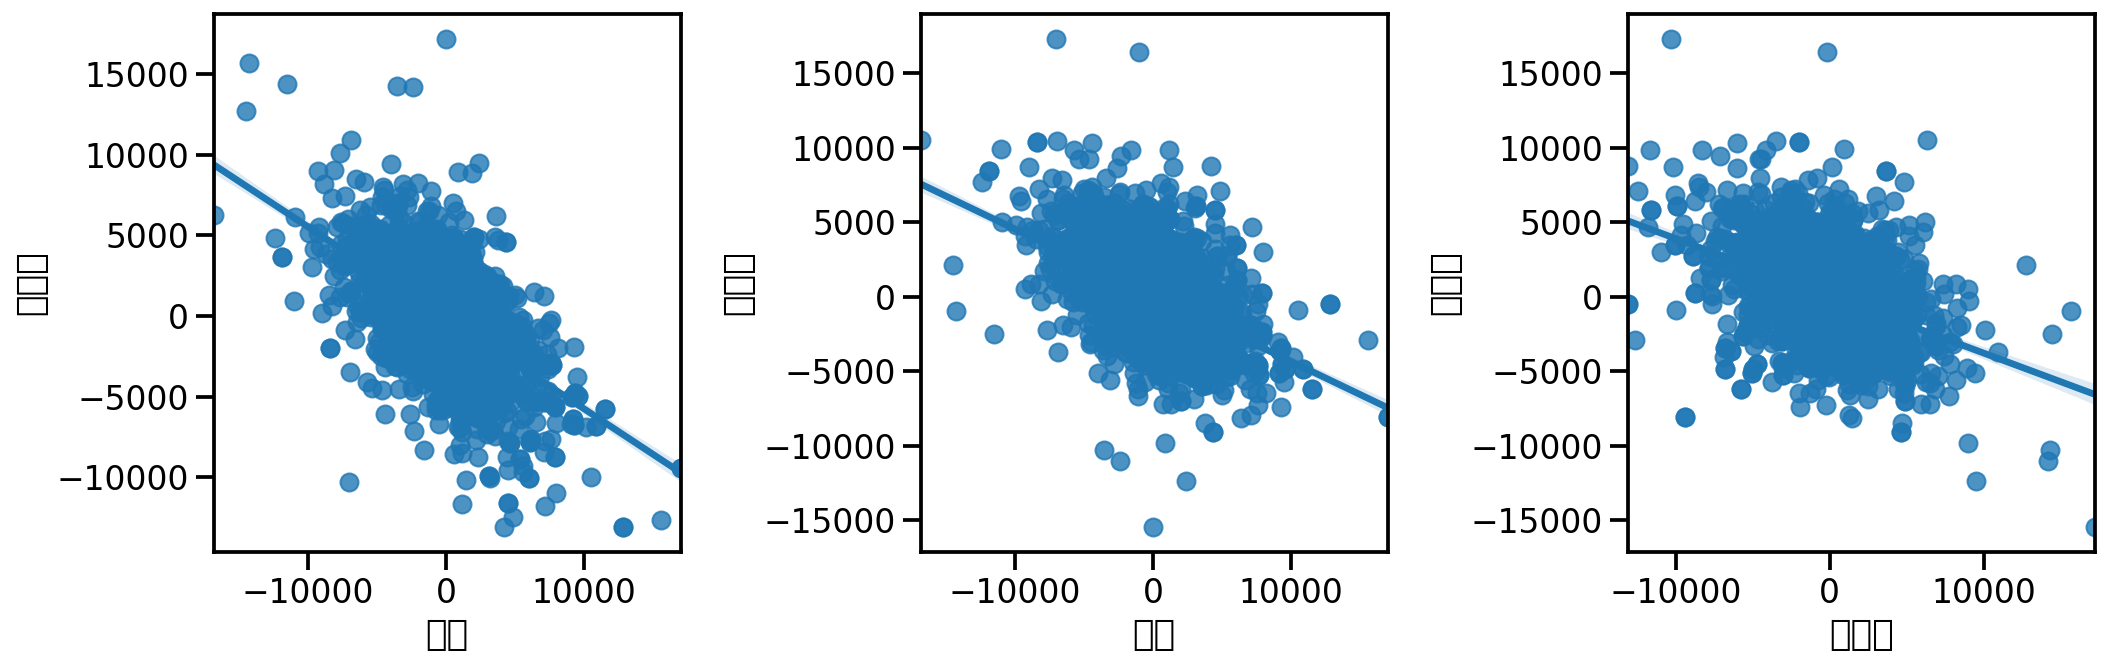

In [18]:


fig, axes = plt.subplots(ncols=3)
fig.set_size_inches(15, 5)
for ax, comb in zip(axes, it.combinations(['개인',  '외국인',  '기관계'],  2)):
  sns.regplot(comb[0], comb[1], df, ax=ax)
fig.tight_layout()